# Importing necessary libraries

In [1]:
# Working directory
import os

# Processing data
import pandas as pd
import numpy as np
import datetime

# Linear regression model
import statsmodels.api as sm

# t test
from scipy.stats import t

# Plotting
import matplotlib.pyplot as plt

# 1. Event definition

#### We are conducting an analysis to assess the impact of a significant event on stock market returns.  The event of interest is the election of Donald J. Trump as the 47th President of the United States of America on November 6, 2024. We choose a 11-day event window, comprising 5 trading days before the event day, the event day, and 5 trading days after the event day.


In [2]:
# Defining the event window 
event_date = '2024-11-06'
event_start = -5
event_end = 5

# 2. Selection criteria

#### Our study specifically focuses on Tesla, Inc., a company of particular interest due to its CEO, Elon Musk, who has publicly expressed his support for Donald Trump. 

In [3]:
# Defining the stock
security_ticker = 'TSLA'

# 3. Normal and abnormal returns

#### We use the market model to estimate normal returns, using the S&P 500 index as the market portfolio.

In [4]:
# Defining the market portfolio
market_ticker = 'SPX'

# 4. Estimation procedure

#### We choose a 120-trading-days estimation window ending 10 days prior to the event window.

In [5]:
# Defining the estimation window
estimation_end = event_start - 10 - 1 
estimation_start = estimation_end - (120 - 1)

### Importing data

In [6]:
# Setting the working directory
os.chdir('C:/Users/fulia/OneDrive/xjtlu/ECO301/Code/event_study')

In [7]:
# Importing historical data: securities
data_securities = pd.read_excel("stock_price_securities.xlsx", skiprows=[1, 2])
data_securities.head()

,TradingDate,Symbol,StatusID,Filling,SecurityID,ClosePrice
0,2022-11-14,TSLA,0,0,201004195396,190.95
1,2022-11-15,TSLA,0,0,201004195396,194.42
2,2022-11-16,TSLA,0,0,201004195396,186.92
3,2022-11-17,TSLA,0,0,201004195396,183.17
4,2022-11-18,TSLA,0,0,201004195396,180.19


In [8]:
data_securities.rename(columns={'TradingDate': 'trading_date', 'Symbol': 'security_ticker', 'ClosePrice': 'price'}, 
                       inplace=True)
data_securities = data_securities[['trading_date', 'security_ticker', 'price']]
data_securities = data_securities[data_securities['security_ticker']==security_ticker]
data_securities.head()

,trading_date,security_ticker,price
0,2022-11-14,TSLA,190.95
1,2022-11-15,TSLA,194.42
2,2022-11-16,TSLA,186.92
3,2022-11-17,TSLA,183.17
4,2022-11-18,TSLA,180.19


In [9]:
## Calculating daily returns 
data_securities['return'] =  data_securities['price'].pct_change()
data_securities = data_securities[['trading_date', 'return']]
data_securities.head()

,trading_date,return
0,2022-11-14,NaN
1,2022-11-15,0.018172
2,2022-11-16,-0.038576
3,2022-11-17,-0.020062
4,2022-11-18,-0.016269


In [10]:
# Importing historical data: market portfolio
data_market = pd.read_excel("stock_price_market.xlsx", skiprows=[1, 2])
data_market.head()

,Indexcd,Trddt,ExhcdOrIndexcd,IndexName,Clsidx
0,SPX,2021-01-04,SPI,S&P 500,3700.65
1,SPX,2021-01-05,SPI,S&P 500,3726.86
2,SPX,2021-01-06,SPI,S&P 500,3748.14
3,SPX,2021-01-07,SPI,S&P 500,3803.79
4,SPX,2021-01-08,SPI,S&P 500,3824.68


In [11]:
data_market.rename(columns={'Indexcd': 'market_ticker', 'Trddt': 'trading_date', 'Clsidx': 'price'}, 
                   inplace=True)
data_market = data_market[['trading_date', 'market_ticker', 'price']]
data_market = data_market[data_market['market_ticker']==market_ticker]
data_market.head()

,trading_date,market_ticker,price
0,2021-01-04,SPX,3700.65
1,2021-01-05,SPX,3726.86
2,2021-01-06,SPX,3748.14
3,2021-01-07,SPX,3803.79
4,2021-01-08,SPX,3824.68


In [12]:
## Calculating daily returns 
data_market['market_return'] =  data_market['price'].pct_change()
data_market = data_market[['trading_date', 'market_return']]
data_market.head()

,trading_date,market_return
0,2021-01-04,NaN
1,2021-01-05,0.007083
2,2021-01-06,0.005710
3,2021-01-07,0.014847
4,2021-01-08,0.005492


In [13]:
# Merging data sets
data_all = pd.merge(data_securities, data_market, on='trading_date', how='left')
data_all.head()

,trading_date,return,market_return
0,2022-11-14,NaN,-0.008936
1,2022-11-15,0.018172,0.008713
2,2022-11-16,-0.038576,-0.008252
3,2022-11-17,-0.020062,-0.003089
4,2022-11-18,-0.016269,0.004759


In [14]:
index_event_day = data_all.index[data_all['trading_date']==event_date].tolist()
if index_event_day:
    data_all['event_time'] = 0
    for i in range(len(data_all)):
        data_all.loc[data_all.index[i], 'event_time'] = i - index_event_day[0]
else:
    print("No trading date matches the event date.")
data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]

,trading_date,return,market_return,event_time
492,2024-10-30,-0.007591,-0.003300,-5
493,2024-10-31,-0.029897,-0.018615,-4
494,2024-11-01,-0.003482,0.004093,-3
495,2024-11-04,-0.024661,-0.002812,-2
496,2024-11-05,0.035414,0.012266,-1
497,2024-11-06,0.147510,0.025296,0
498,2024-11-07,0.029044,0.007431,1
499,2024-11-08,0.081877,0.003757,2
500,2024-11-11,0.089596,0.000969,3
501,2024-11-12,-0.061457,-0.002893,4


### Estimating the market model

In [15]:
data_all_estimation = data_all[(data_all['event_time']>=estimation_start) & (data_all['event_time']<=estimation_end)]
data_all_estimation.tail()

,trading_date,return,market_return,event_time
477,2024-10-09,-0.014110,0.007113,-20
478,2024-10-10,-0.009459,-0.002070,-19
479,2024-10-11,-0.087825,0.006052,-18
480,2024-10-14,0.006244,0.007708,-17
481,2024-10-15,0.001871,-0.007609,-16


In [16]:
X_estimation = data_all_estimation['market_return']
X_estimation = sm.add_constant(X_estimation)
R_estimation = data_all_estimation['return']
market_model = sm.OLS(R_estimation, X_estimation).fit()
print(market_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     54.80
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.15e-11
Time:                        21:01:33   Log-Likelihood:                 244.22
No. Observations:                 120   AIC:                            -484.4
Df Residuals:                     118   BIC:                            -478.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.003      0.077

# 5. Testing procedure

### Calculating abnormal returns

In [17]:
data_all_event = data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]
data_all_event = data_all_event.reset_index()
data_all_event

,index,trading_date,return,market_return,event_time
0,492,2024-10-30,-0.007591,-0.003300,-5
1,493,2024-10-31,-0.029897,-0.018615,-4
2,494,2024-11-01,-0.003482,0.004093,-3
3,495,2024-11-04,-0.024661,-0.002812,-2
4,496,2024-11-05,0.035414,0.012266,-1
5,497,2024-11-06,0.147510,0.025296,0
6,498,2024-11-07,0.029044,0.007431,1
7,499,2024-11-08,0.081877,0.003757,2
8,500,2024-11-11,0.089596,0.000969,3
9,501,2024-11-12,-0.061457,-0.002893,4


In [18]:
## Calculating normal returns 
X_event = data_all_event['market_return']
X_event = sm.add_constant(X_event)
data_all_event['normal_return'] = market_model.predict(X_event)

In [19]:
# Calculateing abnormal returns as the difference between actual returns and normal returns
data_all_event['abnormal_return'] = data_all_event['return'] - data_all_event['normal_return']

### Calculating cumulative abnormal returns

In [20]:
# Aggregating the abnormal returns over the event window to get the cumulative abnormal returns
data_all_event['cumulative_abnormal_return'] = data_all_event['abnormal_return'].cumsum()

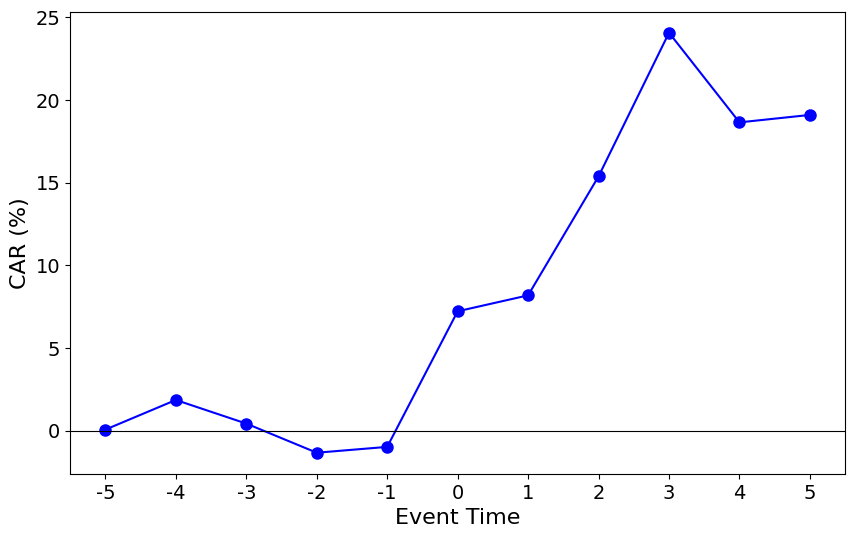

In [21]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['cumulative_abnormal_return'], 
         marker='o', linestyle='-', color='b', markersize=8) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('CAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Significane of ARs and CARs

In [22]:
# Calculating the sample standard errors of ARs
## Equations (4.4) and (4.5)
L1 = data_all_estimation.shape[0]
e_hat_estimation = market_model.resid
sigma2_hat = np.sum(np.square(e_hat_estimation)) / (L1 - 2)
np.sqrt(sigma2_hat)

0.03188334077493424

In [23]:
## Equation (5.3)
L2 = data_all_event.shape[0]
V_hat = sigma2_hat*np.eye(L2) + sigma2_hat*X_event@np.linalg.inv(X_estimation.T@X_estimation)@X_event.T.values
V_hat

,0,1,2,3,4,5,6,7,8,9,10
0,0.001027,0.000019,0.000007,0.000011,0.000002,-0.000005,0.000005,0.000007,0.000009,0.000011,0.000009
1,0.000019,0.001073,0.000001,0.000018,-0.000018,-0.000050,-0.000007,0.000002,0.000009,0.000018,0.000011
2,0.000007,0.000001,0.001026,0.000007,0.000012,0.000017,0.000011,0.000009,0.000008,0.000007,0.000008
3,0.000011,0.000018,0.000007,0.001027,0.000003,-0.000003,0.000005,0.000007,0.000009,0.000010,0.000009
4,0.000002,-0.000018,0.000012,0.000003,0.001040,0.000041,0.000017,0.000012,0.000008,0.000003,0.000007
5,-0.000005,-0.000050,0.000017,-0.000003,0.000041,0.001096,0.000027,0.000016,0.000008,-0.000003,0.000006
6,0.000005,-0.000007,0.000011,0.000005,0.000017,0.000027,0.001030,0.000010,0.000008,0.000005,0.000008
7,0.000007,0.000002,0.000009,0.000007,0.000012,0.000016,0.000010,0.001026,0.000008,0.000007,0.000008
8,0.000009,0.000009,0.000008,0.000009,0.000008,0.000008,0.000008,0.000008,0.001025,0.000009,0.000008
9,0.000011,0.000018,0.000007,0.000010,0.000003,-0.000003,0.000005,0.000007,0.000009,0.001027,0.000009


In [24]:
## Sample standard errors of ARs
data_all_event['s.e._abnormal_return'] = np.sqrt(np.diag(V_hat))

In [25]:
# Calculating the sample standard errors of CARs
data_all_event['s.e._cumulative_abnormal_return'] = np.sqrt(np.cumsum(np.diag(V_hat)))

In [26]:
# t statistics and p values: Testing the significance of CARs
data_all_event['t_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] / data_all_event['s.e._cumulative_abnormal_return']
data_all_event['p_cumulative_abnormal_return'] = 2*t.sf(np.abs(data_all_event['t_cumulative_abnormal_return']), L1 - 2)

In [27]:
# Confidence intervals: CARs
data_all_event['upper_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] + t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']
data_all_event['lower_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] - t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']

In [28]:
data_all_event.rename(columns={'abnormal_return': 'AR',
                               'cumulative_abnormal_return': 'CAR',
                               's.e._abnormal_return': 's.e._AR',
                               's.e._cumulative_abnormal_return': 's.e._CAR',
                               't_cumulative_abnormal_return': 't_CAR',
                               'p_cumulative_abnormal_return': 'p_CAR',
                               'upper_cumulative_abnormal_return': 'upper_CAR',
                               'lower_cumulative_abnormal_return': 'lower_CAR'}, inplace=True)
data_all_event[['event_time', 'AR', 's.e._AR', 'CAR', 's.e._CAR', 't_CAR', 'p_CAR', 'upper_CAR', 'lower_CAR']]

,event_time,AR,s.e._AR,CAR,s.e._CAR,t_CAR,p_CAR,upper_CAR,lower_CAR
0,-5,0.000701,0.032054,0.000701,0.032054,0.021885,0.982577,0.053843,-0.052440
1,-4,0.017919,0.032751,0.018621,0.045827,0.406331,0.685235,0.094595,-0.057354
2,-3,-0.014269,0.032032,0.004352,0.055912,0.077830,0.938095,0.097046,-0.088343
3,-2,-0.017628,0.032046,-0.013276,0.064444,-0.206012,0.837136,0.093564,-0.120117
4,-1,0.003534,0.032249,-0.009742,0.072063,-0.135193,0.892690,0.109728,-0.129213
5,0,0.082001,0.033102,0.072259,0.079302,0.911191,0.364052,0.203731,-0.059213
6,1,0.009640,0.032090,0.081899,0.085548,0.957345,0.340351,0.223728,-0.059929
7,2,0.071956,0.032029,0.153855,0.091348,1.684287,0.094770,0.305298,0.002413
8,3,0.086870,0.032016,0.240726,0.096796,2.486946,0.014283,0.401200,0.080251
9,4,-0.054217,0.032047,0.186509,0.101963,1.829186,0.069897,0.355550,0.017468


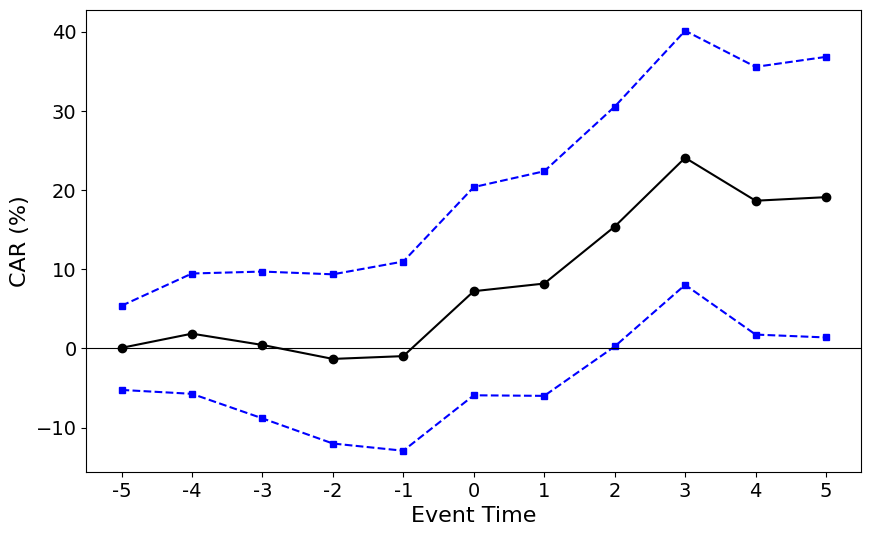

In [29]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['CAR'], 
         marker='o', linestyle='-', color='black', markersize=6) 
plt.plot(data_all_event['event_time'], 100*data_all_event['upper_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.plot(data_all_event['event_time'], 100*data_all_event['lower_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('CAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Replicating the results provided by the 'eventstudy' library

In [30]:
# Sample standard errors of ARs
np.sqrt(np.var(e_hat_estimation))

0.03161652988529483

In [31]:
# Sample standard errors of CARs
np.sqrt(np.var(e_hat_estimation)*range(1,12))

array([0.03161653, 0.04471253, 0.05476144, 0.06323306, 0.07069671,
       0.07744437, 0.08364948, 0.08942505, 0.09484959, 0.09998025,
       0.10486017])

In [32]:
# t statistics
t_statistic = np.array(data_all_event[['CAR']].T) / np.array(np.sqrt(np.var(e_hat_estimation)*range(1,12))).T
t_statistic

array([[ 0.02218763,  0.41645515,  0.07946502, -0.20995866, -0.13780523,
         0.93304521,  0.9790784 ,  1.72049636,  2.53797174,  1.86545903,
         1.82158883]])

In [33]:
# p values
2*t.sf(np.abs(t_statistic), data_all_estimation.shape[0] - 2)

array([[0.98233576, 0.67783351, 0.93679736, 0.83406203, 0.89062923,
        0.35270189, 0.32954431, 0.08796351, 0.01245275, 0.06460074,
        0.07105046]])